# Cleaning and EDA


In [1]:
#import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


In [2]:
# Read data
df = pd.read_csv("data.csv", sep=";",encoding='ISO-8859-1', doublequote=False, skipinitialspace=True)

# Display the first few rows of the DataFrame
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [3]:
df.shape

(1267, 24)

In [4]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

# Technical information about columns

#### Type of ED : Group [1 = Local ED 3th Degree, 2 = Regional ED 4tg Degree]
#### Reason Visit : Injury [1 = No, 2= Yes]
#### Gender : Sex [1 = Female, 2 = Male]
#### Pain : Pain [1 = Yes, 0 = No]
#### Mental : Mental [1 = Alert, 2 = Verbal Response, 3 = Pain Response, 4 = Unresponsive]
#### Mode of Arrival : Arrival Mode [1 = Walking, 2 = Public Ambulance, 3 = Private Vehicle, 4 = Private Ambulance, 5,6,7 = Other]
#### Disposition : Disposition [1 = Discharge, 2 = Admission to ward, 3 = Admission to ICU, 4 = AMA Discharge, 5 = Transfer, 6 = Death, 7 = Surgery]
#### KTAS : KTAS... [1,2,3 = Emergency, 4,5 = Non-Emergency]-Inetrnational ranking triage 
#### RR : Respiratory rate
#### HR :  Heart rate
#### SBP : Systolic blood pressure
#### DBP : Diastolic blood pressure
#### BT : Body Tempature
#### Length of stay_min : Time (minutes) patient needs to wait to be visited by physician
#### KTAS_expert : ER physician evaluate ranking as a expert
#### NRS_Pain : Numeric scale of pain that nurse will assess

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [6]:
import numpy as np

# List of columns to convert
cols_to_convert = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']

# Replace '??' with NaN and convert to float
for col in cols_to_convert:
    df[col] = df[col].replace('??', np.nan).astype(float)

# Now check the data types
print(df.dtypes)


Group                         int64
Sex                           int64
Age                           int64
Patients number per hour      int64
Arrival mode                  int64
Injury                        int64
Chief_complain               object
Mental                        int64
Pain                          int64
NRS_pain                     object
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturation                  float64
KTAS_RN                       int64
Diagnosis in ED              object
Disposition                   int64
KTAS_expert                   int64
Error_group                   int64
Length of stay_min            int64
KTAS duration_min            object
mistriage                     int64
dtype: object


In [7]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BOÞ!",np.NaN)



missing_values_table(df)

                 n_miss  ratio
Saturation          697  55.01
NRS_pain            556  43.88
DBP                  29   2.29
SBP                  25   1.97
RR                   22   1.74
HR                   20   1.58
BT                   18   1.42
Diagnosis in ED       2   0.16


['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'Diagnosis in ED']

In [8]:
#filling Nan values with median
print(df['BT'].median())
df['BT'] = df['BT'].fillna(36.5)

36.5


In [9]:
#filling Nan values with median
print(df['RR'].median())
df['RR'] = df['RR'].fillna(36.5)

20.0


In [10]:
#filling Nan values with median
print(df['HR'].median())
df['HR'] = df['HR'].fillna(36.5)

82.0


In [11]:
#filling Nan values with median
print(df['BT'].median())
df['BT'] = df['BT'].fillna(36.5)

36.5


In [12]:
df.groupby('Group').count()

,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
Group,,,,,,,,,,,,,,,,,,,,,
1,688,688,688,688,688,688,688,688,370,670,...,688,0,688,688,688,688,688,688,688,688
2,579,579,579,579,579,579,579,579,341,572,...,579,570,579,577,579,579,579,579,579,579


In [13]:
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))

In [14]:
missing_values_table(df)

                 n_miss  ratio
NRS_pain            556  43.88
DBP                  29   2.29
SBP                  25   1.97
Diagnosis in ED       2   0.16


['NRS_pain', 'SBP', 'DBP', 'Diagnosis in ED']

In [15]:
df.loc[(df['SBP'] <=70), ['SBP', 'DBP']]

,SBP,DBP
122,50.0,33.0
123,50.0,33.0
133,65.0,45.0
153,70.0,NaN
968,60.0,NaN
971,70.0,NaN
1054,60.0,NaN
1131,70.0,40.0
1205,70.0,40.0


In [16]:
df.loc[(df['SBP'] <= 70), 'DBP'].mean()

38.2

In [17]:
#Filling DBP where only SBP is present. Median of this group's SBP is considerably lower. Using the median DBP of SBP's less than 70
df.loc[(df['DBP'].isnull()) & (df['SBP'].notnull()), 'DBP'] = [38.2 for x in df.loc[(df['DBP'].isnull()) & \
                                                   (df['SBP'].notnull()), 'SBP']]

In [18]:
df['DBP'].median()

80.0

In [19]:
df['SBP'].median()

130.0

In [20]:
#Filling the rest of DBP and SBP with median
df['DBP'] = df['DBP'].fillna(80)
df['SBP'] = df['SBP'].fillna(130)

In [21]:
df['NRS_pain'].unique()

array(['2', '3', '4', '5', '6', '8', '9', nan, '1', '7', '10'],
      dtype=object)

In [22]:
#Filling pain_scale nan with 0 if no pain present
df['NRS_pain'] = df['NRS_pain'].fillna(0)

In [23]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [24]:
#Disposition 
#[1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]
df['Disposition'].unique()

array([1, 2, 5, 7, 6, 3, 4], dtype=int64)

In [25]:
# Group results column based on whether the patient is admitted to the hospital or not
df['Disposition'] = df['Disposition'].replace({1:0, 2:1, 5:1, 7:1, 6:0,
                                              3:1, 4:0})


In [26]:
df['Disposition'].unique()

array([0, 1], dtype=int64)

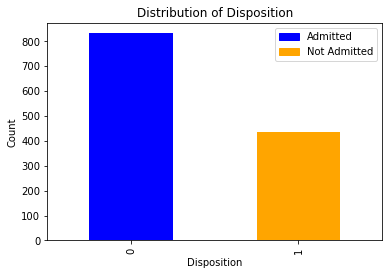

In [27]:
# Plotting the bar chart
df['Disposition'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Disposition')

# Create patches for the legend
patches = [mpatches.Patch(color='blue', label='Admitted'), 
           mpatches.Patch(color='orange', label='Not Admitted')]

# Add the legend to the plot
plt.legend(handles=patches)

# Add labels for the x and y axes
plt.xlabel('Disposition')
plt.ylabel('Count')

plt.show()


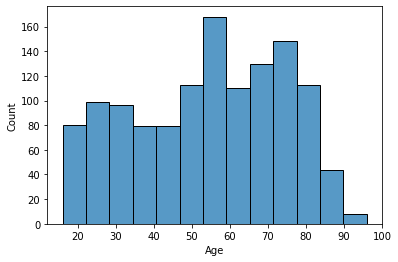

In [28]:
#Get the Hist plot of Age
sns.histplot(df['Age'])

In [29]:
#female=1, Male=2 >>> change it to Female =0 Male=1

df['Sex'] = df['Sex'].replace({1:0, 2:1})


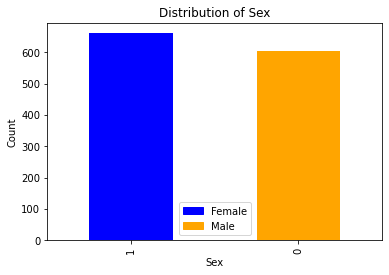

In [30]:
# Plotting the bar chart
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Sex')

# Create patches for the legend
patches = [mpatches.Patch(color='blue', label='Female'), 
           mpatches.Patch(color='orange', label='Male')]

# Add the legend to the plot
plt.legend(handles=patches)

# Add labels for the x and y axes
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()


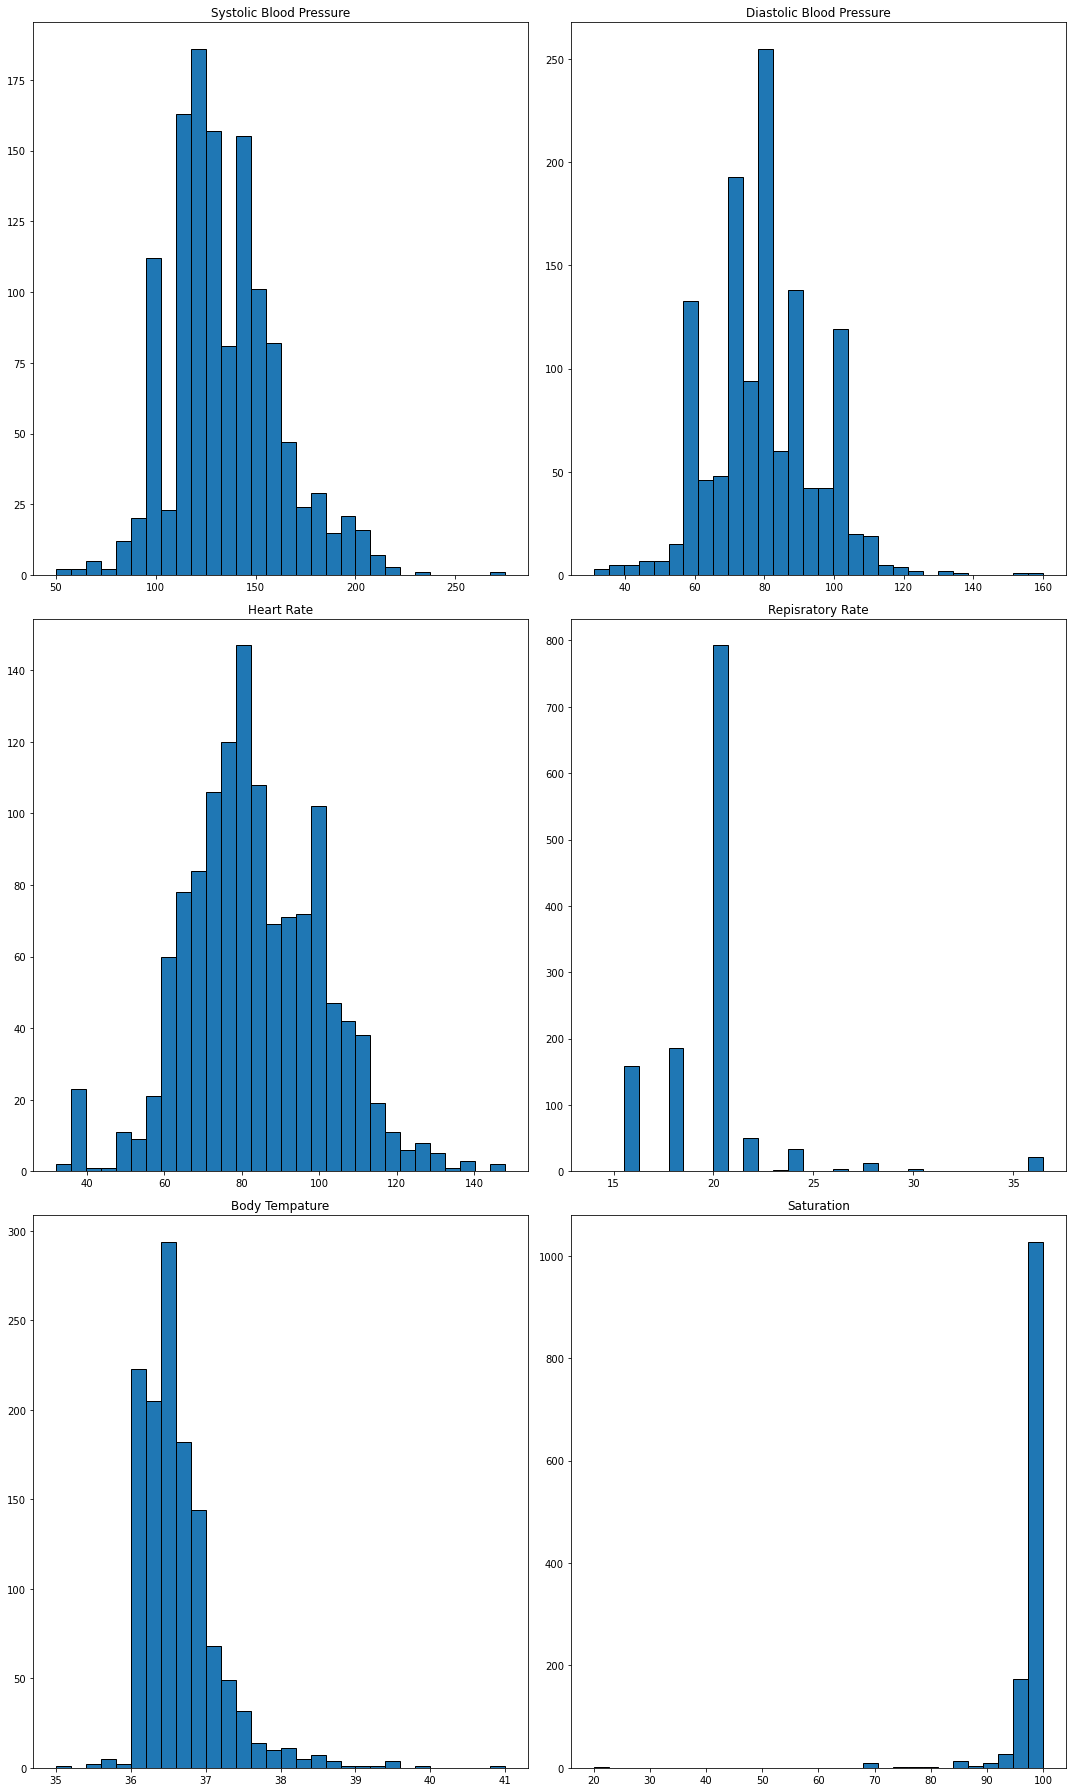

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(15, 25))

ax[0, 0].hist(df['SBP'], bins=30, edgecolor='black') 
ax[0, 0].set_title('Systolic Blood Pressure')

ax[0, 1].hist(df['DBP'], bins=30, edgecolor='black') 
ax[0, 1].set_title('Diastolic Blood Pressure')

ax[1, 0].hist(df['HR'], bins=30, edgecolor='black') 
ax[1, 0].set_title('Heart Rate')

ax[1, 1].hist(df['RR'], bins=30, edgecolor='black') 
ax[1, 1].set_title('Repisratory Rate')

ax[2, 0].hist(df['BT'], bins=30, edgecolor='black') 
ax[2, 0].set_title('Body Tempature')

ax[2, 1].hist(df['Saturation'], bins=30, edgecolor='black') 
ax[2, 1].set_title('Saturation')

plt.tight_layout()
plt.show()


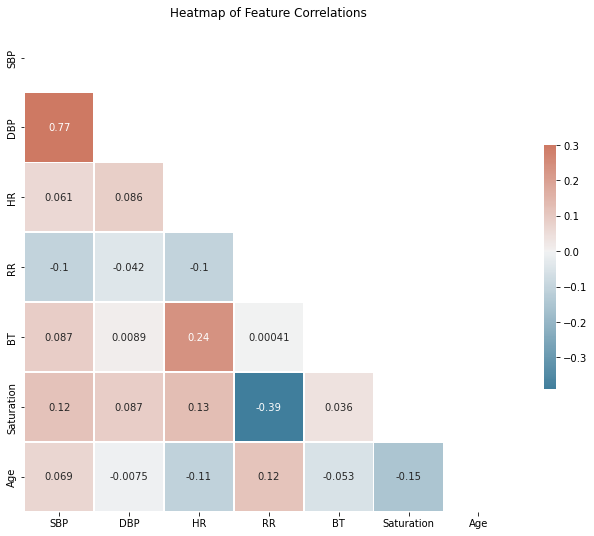

In [32]:
##Correlation heatmap

# Compute the correlation matrix
corr = df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation','Age']].corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask, correct aspect ratio, and annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Feature Correlations')
plt.show()


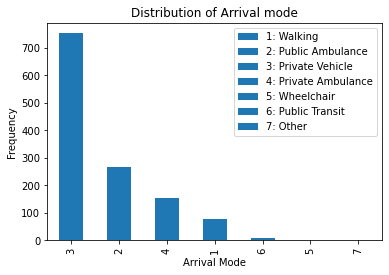

In [33]:
import matplotlib.patches as mpatches

df['Arrival mode'].value_counts().plot(kind='bar')
plt.title('Distribution of Arrival mode')

# Create patches for the legend
patches = [mpatches.Patch(label='1: Walking'), 
           mpatches.Patch(label='2: Public Ambulance'), 
           mpatches.Patch(label='3: Private Vehicle'), 
           mpatches.Patch(label='4: Private Ambulance'),
           mpatches.Patch(label='5: Wheelchair'),
           mpatches.Patch(label='6: Public Transit'),
           mpatches.Patch(label='7: Other')
           ]

# Add the legend to the plot
plt.legend(handles=patches, loc='upper right')

# Add labels for the x and y axes
plt.xlabel('Arrival Mode')
plt.ylabel('Frequency')

plt.show()

arrival_modes_to_replace = [5,6,7]
        
# Replace in dataframe
for mode in arrival_modes_to_replace:
    df['Arrival mode'] = df['Arrival mode'].replace(mode,"Other")

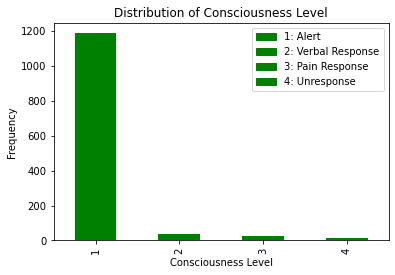

In [34]:
df['Mental'].value_counts().plot(kind='bar' , color='Green')
plt.title('Distribution of Consciousness Level')

# Mental [1 = Alert, 2 = Verbol Response, 3 = Pain Response, 4 = Unresponse]
# Create patches for the legend
patches = [mpatches.Patch(color='green', label='1: Alert'), 
           mpatches.Patch(color='green', label='2: Verbal Response'), 
           mpatches.Patch(color='green', label='3: Pain Response'), 
           mpatches.Patch(color='green', label='4: Unresponse')
           ]

# Add the legend to the plot
plt.legend(handles=patches, loc='upper right')

# Add labels for the x and y axes
plt.xlabel('Consciousness Level')
plt.ylabel('Frequency')

plt.show()


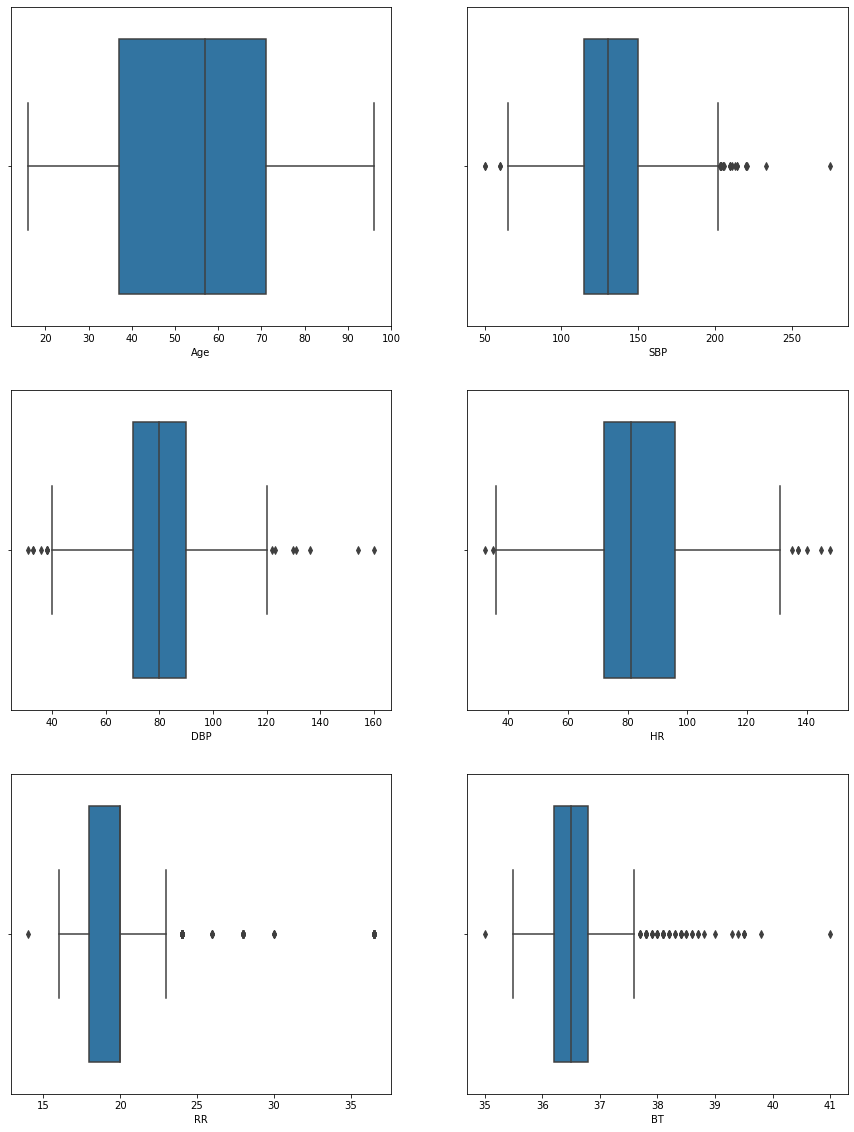

In [35]:
#plotting some boxplots
fig, ax = plt.subplots(3,2, figsize=(15,20))
sns.boxplot(x=df["Age"], ax=ax[0,0]);
sns.boxplot(x=df["SBP"], ax=ax[0,1]);
sns.boxplot(x=df["DBP"], ax=ax[1,0]);
sns.boxplot(x=df["HR"], ax=ax[1,1]);
sns.boxplot(x=df["RR"], ax=ax[2,0]);
sns.boxplot(x=df["BT"], ax=ax[2,1]);



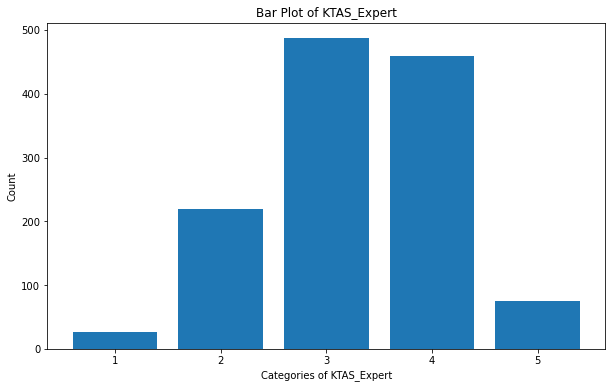

In [36]:
counts = df["KTAS_expert"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values)
plt.xlabel('Categories of KTAS_Expert')
plt.ylabel('Count')
plt.title('Bar Plot of KTAS_Expert')
plt.show()

# Modeling

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# Scale the columns
scaler = StandardScaler()
df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation','Age']] = scaler.fit_transform(df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation','Age']])


In [39]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,1,0.840694,3,3,2,right ocular pain,1,1,2,...,0.037883,0.699964,2,Corneal abrasion,0,4,2,86,"5,00",1
1,1,0,0.079938,12,3,2,right forearm burn,1,1,2,...,-0.146726,0.187331,4,"Burn of hand, firts degree dorsum",0,5,4,64,"3,95",1
2,2,0,0.688543,8,2,2,"arm pain, Lt",1,1,2,...,0.037883,0.187331,4,"Fracture of surgical neck of humerus, closed",1,5,4,862,"1,00",1
3,1,1,0.840694,8,1,1,ascites tapping,1,1,3,...,-0.146726,0.187331,4,Alcoholic liver cirrhosis with ascites,0,5,6,108,"9,83",1
4,1,1,0.181372,4,3,1,"distension, abd",1,1,3,...,-0.146726,0.187331,4,Ascites,0,5,8,109,"6,60",1


In [40]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [41]:
#choose the new df with selected variables
df_modified=df[['Sex', 'Age','Arrival mode','Injury','Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_expert']]

In [42]:
df_modified['Arrival mode'] = df_modified['Arrival mode'].astype(str)
df_modified['NRS_pain'] = df_modified['NRS_pain'].astype(int)
df_modified.dtypes

C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sex               int64
Age             float64
Arrival mode     object
Injury            int64
Mental            int64
Pain              int64
NRS_pain          int32
SBP             float64
DBP             float64
HR              float64
RR              float64
BT              float64
Saturation      float64
KTAS_expert       int64
dtype: object

In [43]:
# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)


In [44]:
print(y.value_counts())
#[1,2,3 = Emergency, 4,5 = Non-Emergency]

3    487
4    459
2    220
5     75
1     26
Name: KTAS_expert, dtype: int64


In [45]:
X.head()

,Sex,Age,Injury,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,Arrival mode_1,Arrival mode_2,Arrival mode_3,Arrival mode_4,Arrival mode_Other
0,1,0.840694,2,1,1,2,0.978664,1.342617,0.044834,-0.603315,0.037883,0.699964,0,0,1,0,0
1,0,0.079938,2,1,1,2,0.126784,-0.307061,-1.323953,0.066330,-0.146726,0.187331,0,0,1,0,0
2,0,0.688543,2,1,1,2,-0.132484,0.022874,1.071424,0.066330,0.037883,0.187331,0,1,0,0,0
3,1,0.840694,1,1,1,3,0.200860,0.946694,0.272965,0.066330,-0.146726,0.187331,1,0,0,0,0
4,1,0.181372,1,1,1,3,-1.576977,-0.834958,0.558129,-0.603315,-0.146726,0.187331,0,0,1,0,0


In [46]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# Logistic regression for Scaled data

In [47]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
# Fit the model using training data
classifier.fit(X_train,y_train)

C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [48]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
535,2,3
564,4,3
955,4,2
1067,3,4
96,4,3
...,...,...
574,4,3
89,4,3
492,4,4
602,4,4


In [49]:
print( f'accuracy score of the model is : {accuracy_score(y_test, predictions)}')


accuracy score of the model is : 0.5741324921135647


In [50]:
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_test, predictions)
test_matrix

array([[ 4,  2,  0,  0,  0],
       [ 1, 14, 27, 13,  0],
       [ 0,  4, 85, 33,  0],
       [ 0,  3, 33, 79,  0],
       [ 0,  1,  8, 10,  0]], dtype=int64)

In [51]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.58      0.25      0.35        55
           3       0.56      0.70      0.62       122
           4       0.59      0.69      0.63       115
           5       0.00      0.00      0.00        19

    accuracy                           0.57       317
   macro avg       0.50      0.46      0.47       317
weighted avg       0.54      0.57      0.54       317



C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest for Scaled data

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6181102362204725
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.67      0.37      0.47        49
           3       0.59      0.79      0.68        91
           4       0.62      0.73      0.67        83
           5       0.00      0.00      0.00        25

    accuracy                           0.62       254
   macro avg       0.58      0.58      0.56       254
weighted avg       0.57      0.62      0.58       254



# Logistic Regression for scaled data + Oversampling

In [53]:
#Logistic Reg + Over sampling

from imblearn.over_sampling import SMOTE

# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6078028747433265
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.96      0.95        85
           2       0.62      0.52      0.57       113
           3       0.52      0.33      0.40        99
           4       0.55      0.56      0.56       101
           5       0.47      0.73      0.57        89

    accuracy                           0.61       487
   macro avg       0.62      0.62      0.61       487
weighted avg       0.61      0.61      0.60       487



# Random Forest for scaled data + Oversampling

In [54]:
#Oversampling + Random Forest

# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
main_model = RandomForestClassifier(random_state=42)

# Train the model
main_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = main_model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7782340862422998
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        85
           2       0.77      0.74      0.76       113
           3       0.63      0.70      0.66        99
           4       0.75      0.58      0.66       101
           5       0.83      0.92      0.87        89

    accuracy                           0.78       487
   macro avg       0.78      0.79      0.78       487
weighted avg       0.78      0.78      0.77       487



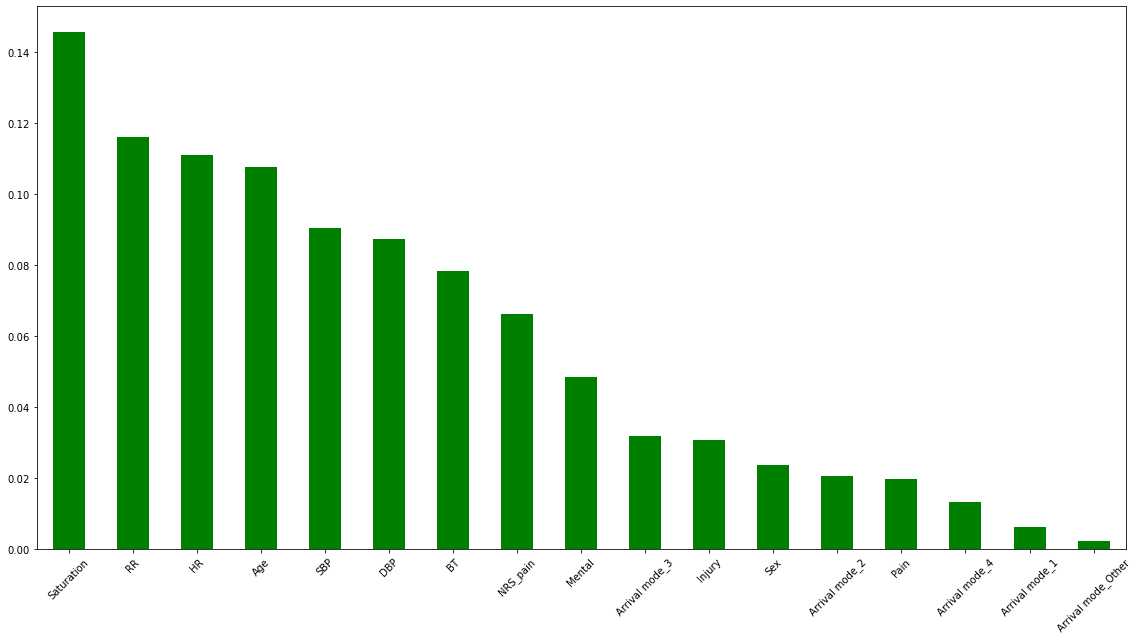

In [55]:
# Get feature importances
importances = main_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45 , color="Green")

# Show the plot
plt.tight_layout()
plt.show()


# Ordinal Regression

In [56]:
import mord

# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the LogisticAT model (an ordinal regression model)
model = mord.LogisticAT()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5433070866141733
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.35      0.12      0.18        49
           3       0.49      0.75      0.59        91
           4       0.62      0.70      0.66        83
           5       0.00      0.00      0.00        25

    accuracy                           0.54       254
   macro avg       0.49      0.51      0.49       254
weighted avg       0.47      0.54      0.49       254



C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ordinal Regression + Over Sampling

In [57]:
# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the LogisticAT model (an ordinal regression model)
model = mord.LogisticAT()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4620123203285421
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.93      0.93        85
           2       0.58      0.33      0.42       113
           3       0.41      0.42      0.42        99
           4       0.27      0.55      0.36       101
           5       0.37      0.12      0.18        89

    accuracy                           0.46       487
   macro avg       0.51      0.47      0.46       487
weighted avg       0.51      0.46      0.45       487



# KNN + Oversampling

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Separate the y variable, the labels
y = df_modified["KTAS_expert"]

# Separate the X variable, the features
X = df_modified.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the KNeighborsClassifier
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7207392197125256
Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        85
           2       0.71      0.75      0.73       113
           3       0.65      0.46      0.54        99
           4       0.68      0.48      0.56       101
           5       0.63      0.98      0.76        89

    accuracy                           0.72       487
   macro avg       0.73      0.73      0.72       487
weighted avg       0.72      0.72      0.71       487



# SVC + Over Sampling

In [59]:
from sklearn.svm import SVC

# Separate the y variable, the labels
y = df["KTAS_expert"]

# Separate the X variable, the features
X = df.drop(columns="KTAS_expert")
X = pd.get_dummies(X)

# Perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the SVC
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.24229979466119098
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.01      0.02        85
           2       0.46      0.23      0.31       113
           3       0.50      0.02      0.04        99
           4       0.00      0.00      0.00       101
           5       0.21      1.00      0.35        89

    accuracy                           0.24       487
   macro avg       0.43      0.25      0.14       487
weighted avg       0.42      0.24      0.15       487



C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deonj\anaconda3\envs\PythonStuff\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from joblib import dump
dump(main_model, 'model.joblib')

['model.joblib']